In [71]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [101]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
df_features = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df_features = df_features[df_features.notnull()]

In [103]:
df_features 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [104]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
df_features['Sex'] = ordinal_enc.fit_transform(df_features[['Sex']]).astype('int32')
df_features.reset_index(inplace = True, drop=True)

In [105]:
df_features.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [114]:
df_features.dropna(inplace=True)

In [122]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits = 3)
sgd_clf = SGDClassifier(random_state = 42)
logreg_clf = LogisticRegression(random_state = 42)

X_train = df_features.drop(columns = ['Survived','Embarked'])
Y_train = df_features['Survived']

In [121]:
for train_index, test_index in skfold.split(X_train, Y_train):
    clone_clf = clone(logreg_clf)
    
    x = X_train.iloc[train_index]
    y = Y_train.iloc[train_index]
    
    x_test = X_train.iloc[test_index]
    y_test = Y_train.iloc[test_index]
    
    clone_clf.fit(x, y)
    y_pred = clone_clf.predict(x_test)
    n_correct = sum(y_pred == y_test)
    print(n_correct / len(y_pred))

0.7899159663865546
0.8059071729957806
0.7974683544303798


In [128]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring='accuracy')

array([0.65546218, 0.72995781, 0.69620253])

In [130]:
from sklearn.base import BaseEstimator

class ZeroClf(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype='bool')

In [131]:
zeroClf = ZeroClf()

cross_val_score(zeroClf, X_train, Y_train, cv = 3, scoring='accuracy')

array([0.63865546, 0.53586498, 0.61181435])

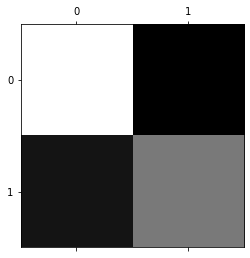

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Y_train_predict = cross_val_predict(logreg_clf, X_train, Y_train, cv = 3)
plt.matshow(confusion_matrix(Y_train, Y_train_predict), cmap = 'gray')

In [146]:
print(precision_score(Y_train, Y_train_predict))
print(recall_score(Y_train, Y_train_predict))
print(f1_score(Y_train, Y_train_predict))

0.7727272727272727
0.7083333333333334
0.7391304347826088
